<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(2_8)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_2.8_n250.csv',
 'data_add_delta_2.8_n120.csv',
 'data_add_delta_2.8_n60.csv',
 'data_add_delta_2.8_n30.csv',
 'data_add_delta_2.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.616874,55.135879,54.035797,-247.418763,-65.630213,174.081633,-239.711846
1,0.0,1.0,42.701421,79.516244,37.833548,240.819893,410.871107,143.466652,267.404455
2,0.0,2.0,38.769487,71.185463,31.246058,58.946040,210.147048,116.440943,93.706105
3,0.0,3.0,84.417542,56.423741,55.718684,-209.378521,-2.818555,191.463233,-194.281787
4,0.0,4.0,35.216404,62.964823,99.283551,364.442837,571.907615,284.701847,287.205768
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,95.728137,52.264109,70.242367,171.474095,399.708708,237.197219,162.511489
119996,999.0,116.0,87.853631,49.465225,67.493087,-3.609876,211.202067,222.082627,-10.880560
119997,999.0,117.0,58.198367,33.162426,37.849899,-132.420327,6.790365,95.261694,-88.471330
119998,999.0,118.0,43.863691,90.991488,70.971869,939.269441,1155.096488,259.037397,896.059091


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.616874,55.135879,54.035797,-247.418763,-65.630213,174.081633,-239.711846
1,0.0,1.0,42.701421,79.516244,37.833548,240.819893,410.871107,143.466652,267.404455
2,0.0,2.0,38.769487,71.185463,31.246058,58.946040,210.147048,116.440943,93.706105
3,0.0,3.0,84.417542,56.423741,55.718684,-209.378521,-2.818555,191.463233,-194.281787
4,0.0,4.0,35.216404,62.964823,99.283551,364.442837,571.907615,284.701847,287.205768
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,95.728137,52.264109,70.242367,171.474095,399.708708,237.197219,162.511489
119996,999.0,116.0,87.853631,49.465225,67.493087,-3.609876,211.202067,222.082627,-10.880560
119997,999.0,117.0,58.198367,33.162426,37.849899,-132.420327,6.790365,95.261694,-88.471330
119998,999.0,118.0,43.863691,90.991488,70.971869,939.269441,1155.096488,259.037397,896.059091


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    62.616874  55.135879  ...  174.081633 -239.711846
      1.0    42.701421  79.516244  ...  143.466652  267.404455
      2.0    38.769487  71.185463  ...  116.440943   93.706105
      3.0    84.417542  56.423741  ...  191.463233 -194.281787
      4.0    35.216404  62.964823  ...  284.701847  287.205768
...                ...        ...  ...         ...         ...
999.0 115.0  95.728137  52.264109  ...  237.197219  162.511489
      116.0  87.853631  49.465225  ...  222.082627  -10.880560
      117.0  58.198367  33.162426  ...   95.261694  -88.471330
      118.0  43.863691  90.991488  ...  259.037397  896.059091
      119.0  49.278349  82.395453  ...  167.927400 -212.407093

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    62.616874  55.135879  ...  174.081633 -239.711846
      1.0    42.701421  79.516244  ...  143.466652  267.404455
      2.0    38.769487  71.185463  ...  116.440943   93.706105
      3.0    84.417542  56.423741  ...  191.463233 -194.281787
      4.0    35.216404  62.964823  ...  284.701847  287.205768
...                ...        ...  ...         ...         ...
999.0 115.0  95.728137  52.264109  ...  237.197219  162.511489
      116.0  87.853631  49.465225  ...  222.082627  -10.880560
      117.0  58.198367  33.162426  ...   95.261694  -88.471330
      118.0  43.863691  90.991488  ...  259.037397  896.059091
      119.0  49.278349  82.395453  ...  167.927400 -212.407093

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.616874,55.135879,54.035797,-247.418763,-65.630213,174.081633,-239.711846
1,0.0,1.0,42.701421,79.516244,37.833548,240.819893,410.871107,143.466652,267.404455
2,0.0,2.0,38.769487,71.185463,31.246058,58.946040,210.147048,116.440943,93.706105
3,0.0,3.0,84.417542,56.423741,55.718684,-209.378521,-2.818555,191.463233,-194.281787
4,0.0,4.0,35.216404,62.964823,99.283551,364.442837,571.907615,284.701847,287.205768
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,95.728137,52.264109,70.242367,171.474095,399.708708,237.197219,162.511489
119996,999.0,116.0,87.853631,49.465225,67.493087,-3.609876,211.202067,222.082627,-10.880560
119997,999.0,117.0,58.198367,33.162426,37.849899,-132.420327,6.790365,95.261694,-88.471330
119998,999.0,118.0,43.863691,90.991488,70.971869,939.269441,1155.096488,259.037397,896.059091


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    62.616874  55.135879  ...  174.081633 -239.711846
      1.0    42.701421  79.516244  ...  143.466652  267.404455
      2.0    38.769487  71.185463  ...  116.440943   93.706105
      3.0    84.417542  56.423741  ...  191.463233 -194.281787
      4.0    35.216404  62.964823  ...  284.701847  287.205768
...                ...        ...  ...         ...         ...
999.0 115.0  95.728137  52.264109  ...  237.197219  162.511489
      116.0  87.853631  49.465225  ...  222.082627  -10.880560
      117.0  58.198367  33.162426  ...   95.261694  -88.471330
      118.0  43.863691  90.991488  ...  259.037397  896.059091
      119.0  49.278349  82.395453  ...  167.927400 -212.407093

[120000 rows x 7 columns]

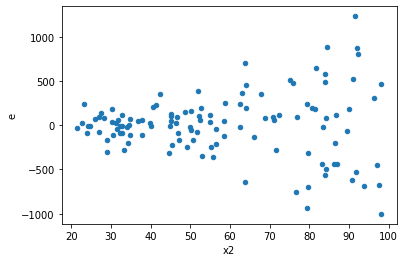

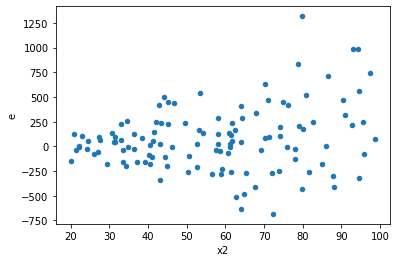

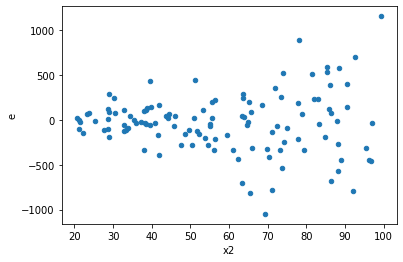

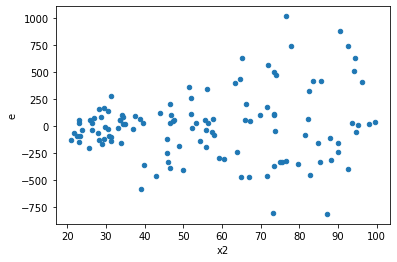

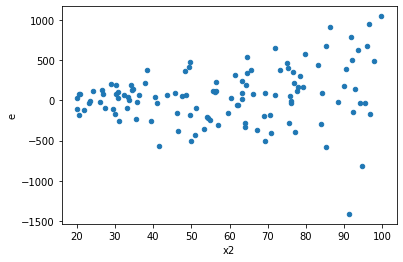

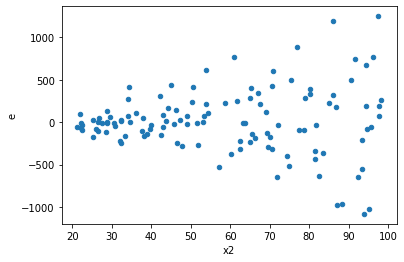

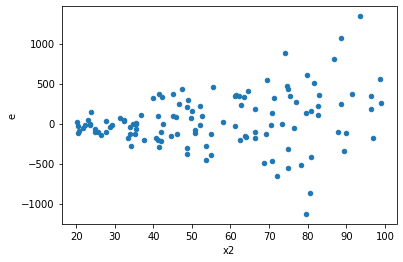

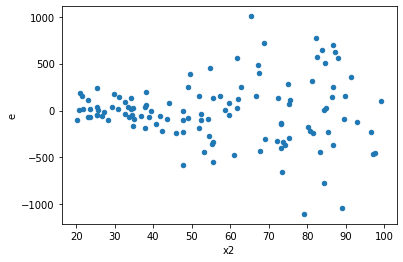

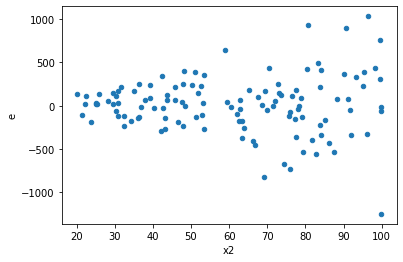

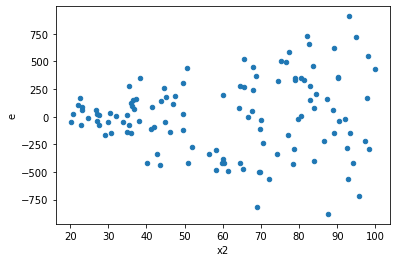

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,876428.1796338906,12876221.576054474,19476.181769642015,286138.257245655,14.69170192751361,1.3322676295501878e-15,0.9999999999999993,6.661338147750939e-16,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,1389188.190987113,7648788.399664695,30870.84868860251,169973.07554810433,5.50594113115064,6.902822224930105e-08,0.9999999654858889,3.4514111124650526e-08,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,1048751.2030362138,10072939.065611469,23305.58228969364,223843.09034692153,9.604698460845194,4.611200310478125e-12,0.9999999999976944,2.3056001552390626e-12,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,1196694.7803527275,8781747.362482585,26593.217341171723,195149.9413885019,7.33833514331378,5.744225095583033e-10,0.9999999997127887,2.8721125477915166e-10,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,2044939.2345160213,9980808.659832384,45443.09410035603,221795.7479962752,4.8807360587389566,4.5186199426616724e-07,0.9999997740690029,2.2593099713308362e-07,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,1073750.5764651222,13962099.9635408,23861.12392144716,310268.88807868445,13.003112891920594,1.4654943925052066e-14,0.9999999999999927,7.327471962526033e-15,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,1082904.7817699057,10053109.927153703,24064.550705997906,223402.44282563785,9.28346618871037,8.62043769700449e-12,0.9999999999956898,4.310218848502245e-12,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,688914.0666957799,9976118.607232124,15309.201482128443,221691.5246051583,14.480933239003688,1.7763568394002505e-15,0.9999999999999991,8.881784197001252e-16,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,1281932.8510334988,8496299.277276706,28487.396689633308,188806.65060614902,6.627725680348202,3.287200067703111e-09,0.9999999983564,1.6436000338515555e-09,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,876428.1796338906,12876221.576054474,19476.181769642015,286138.257245655,14.69170192751361,1.3322676295501878e-15,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,1389188.190987113,7648788.399664695,30870.84868860251,169973.07554810433,5.50594113115064,6.902822224930105e-08,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,1048751.2030362138,10072939.065611469,23305.58228969364,223843.09034692153,9.604698460845194,4.611200310478125e-12,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,1196694.7803527275,8781747.362482585,26593.217341171723,195149.9413885019,7.33833514331378,5.744225095583033e-10,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,2044939.2345160213,9980808.659832384,45443.09410035603,221795.7479962752,4.8807360587389566,4.5186199426616724e-07,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,1073750.5764651222,13962099.9635408,23861.12392144716,310268.88807868445,13.003112891920594,1.4654943925052066e-14,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,1082904.7817699057,10053109.927153703,24064.550705997906,223402.44282563785,9.28346618871037,8.62043769700449e-12,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,688914.0666957799,9976118.607232124,15309.201482128443,221691.5246051583,14.480933239003688,1.7763568394002505e-15,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,1281932.8510334988,8496299.277276706,28487.396689633308,188806.65060614902,6.627725680348202,3.287200067703111e-09,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64